In [40]:
import numpy as np
from scipy.optimize import approx_fprime, minimize
from scipy.misc import derivative
from sympy import diff, symbols, cos, sin
from matplotlib import pyplot as plt

### Задание 1: 
Посчитайте частные производные функций
(как обычно, необходимо решение на бумажке или в LaTeX и на scipy):

1) $f(x,y)=2x^2y^3 + 1/x + y^2x + 7$, а для этой функции также градиент в точке $(1,2)$

2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$

1) $\frac{df}{dx}= 4xy^3 - \frac{1}{x^2} + y^2$

   $\frac{df}{dy}= 6x^2y^2 + 2yx$
   
   в точке (1,2)
   
   $\frac{df}{dx}= 4*2^3 - \frac{1}{1^2} + 2^2$

   $\frac{df}{dy}= 6*1^2*2^2 + 2*2* 1$
   
   $\frac{df}{dx}= 32 - 1 + 4 = 35$

   $\frac{df}{dy}= 24 + 4 = 28$

\begin{equation*}
\nabla
 = 
\begin{bmatrix}
35\\
28
\end{bmatrix}
\end{equation*}


In [9]:
x, y = symbols('x y')
diff((2*(x**2)*(y**3) + 1/x + (y**2)*x + 7), x)

4*x*y**3 + y**2 - 1/x**2

In [11]:
diff(2*(x**2)*(y**3) + 1/x + (y**2)*x + 7, y)

6*x**2*y**2 + 2*x*y

In [12]:
def func(x):
    return 2*(x[0]**2)*(x[1]**3) + 1/x[0] + (x[1]**2)*x[0] + 7
eps = np.sqrt(np.finfo(float).eps)
x = np.array([1, 2])
approx_fprime(x, func, [eps, eps])

array([35.00000024, 28.00000024])

2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$

$\frac{df}{dx}= 2xy - ycos(xy) - 2xsin(x^2)$

   $\frac{df}{dy}= x^2 - xcos(xy) +6$

In [19]:
x, y = symbols('x y')
diff(y * (x**2) - sin(x*y) + cos(x**2) + 6*y, x)

2*x*y - 2*x*sin(x**2) - y*cos(x*y)

In [20]:
diff(y * (x**2) - sin(x*y) + cos(x**2) + 6*y, y)

x**2 - x*cos(x*y) + 6

In [33]:
def func(x):
    return x[1] * (x[0]**2) - sin(x[0]*x[1]) + cos(x[0]**2) + 6*x[1]
eps = np.sqrt(np.finfo(float).eps)
x = np.array([1, 2])
approx_fprime(x, func, [eps, eps])

array([3.14935184, 7.41614687])

### Задание 2:

Градиентный спуск своими руками

In [82]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [83]:
x = np.array([100, 200])
learning_rate = 0.01

In [84]:
for i in range(1000):
    # Calculate gradient
    grad = approx_fprime(x, f, [eps, eps])
    # Update x with gradient
    x = x - learning_rate * grad

In [99]:
# Должен сходится в нуле
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [2.95771327e-07, 6.94893813e-08]
Значение функции в минимуме:  9.230945198879772e-14


Проверка с помощью встроенной функции numpy: 

In [100]:
x = np.array([100, 200])
minimize(f, x, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 138


 final_simplex: (array([[ 2.95771327e-07,  6.94893813e-08],
       [-4.58440767e-07,  4.28023999e-07],
       [-1.29572072e-08, -7.25847730e-07]]), array([9.23094520e-14, 3.93372481e-13, 5.27022817e-13]))
           fun: 9.23094520377088e-14
       message: 'Optimization terminated successfully.'
          nfev: 138
           nit: 72
        status: 0
       success: True
             x: array([2.95771327e-07, 6.94893813e-08])

In [101]:
x = [2.95771327e-07, 6.94893813e-08]

In [102]:
f(x)

9.230945198879772e-14

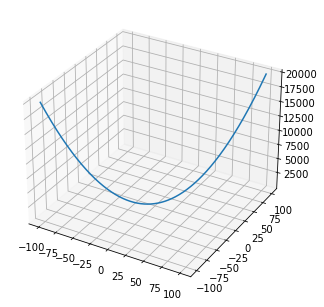

In [103]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(-100,100, 1000)
Y = np.linspace(-100,100, 1000)
Z = f(np.array([X,Y]))
ax.plot(X, Y, Z);